In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib
from icecream import icecream as ic
import time
from sklearn.preprocessing import normalize

In [164]:
imported_module = importlib.import_module("boid")
importlib.reload(imported_module)
from boid import Boid

In [166]:
def polarization(input_flock):
    """
    Caluclates the polarization of the flock, a measure of global ordering. It represents how aligned the velocities of the individual birds are. The higher the number, the more aligned the birds
    are. A nonzero value indicates that the center of mass of the flock is moving. Bigger is better/more accurate for flocks
    :param input_flock:
    :return:
    """
    normed_vel = normalize(input_flock.velocities, axis=0)
    sum_vel = np.sum(normed_vel, axis=1)

    sum_vel = sum_vel / input_flock.boid_count

    order = np.linalg.norm(sum_vel)

    return order

In [163]:
size = 5
flock = Boid(count=size)
sum = polarization(flock)
print(sum)

0.47629384733240276


#For checking conditions

In [167]:
# Start from many random initial conditions.
# 2. For each initial condition, find the trajectory
# of the dynamical system for many steps.
# 3. Plot the points at the end of each trajectory
# How does the attractor depend on 𝜃𝜃?
# ● For small 𝜃𝜃, a point attractor
# ● Bifurcation at 𝜃𝜃 = 3 leads to a 2-cycle
# ● Period-doubling bifurcation (𝜃𝜃 ≈ 3.45)
# leads to 4-cycles
# ● For 𝜃𝜃 > 3.57, strange attractor and chao

size = 200
flock = Boid(count=size)
num_cond = 30
num_steps = 500

metrics = []

for i in range(num_cond):
    flock.reset_flock()
    flock.run(num_steps)
    polar = polarization(flock)
    metrics.append(polar)

nump = np.array(metrics)
print(np.mean(nump))

KeyboardInterrupt: 

# Varying parameters

In [170]:
# Start from many random initial conditions.
# 2. For each initial condition, find the trajectory
# of the dynamical system for many steps.
# 3. Plot the points at the end of each trajectory
# How does the attractor depend on 𝜃𝜃?
# ● For small 𝜃𝜃, a point attractor
# ● Bifurcation at 𝜃𝜃 = 3 leads to a 2-cycle
# ● Period-doubling bifurcation (𝜃𝜃 ≈ 3.45)
# leads to 4-cycles
# ● For 𝜃𝜃 > 3.57, strange attractor and chao
start_time = time.time()

size = 200
flock = Boid(count=size, width=400, height=400)
num_cond = 5
num_steps = 750

centering = np.linspace(0.0005, 1, num=5)
separation = np.linspace(0.0, 2, num=10)
align = np.linspace(0.01, 1, num=10)
print(centering)

same_param = []
metrics = []
for param in centering:
    print(param)
    same_param = []
    for i in range(num_cond):
        flock.reset_param(centering=param, width=400, height=400)
        polar = flock.run(num_steps)
        same_param.append(polar)
    metrics.append(same_param)

print((time.time() - start_time) / 60)
# nump = np.array(metrics)
# print(np.mean(nump))
print(metrics)


[5.00000e-04 2.50375e-01 5.00250e-01 7.50125e-01 1.00000e+00]
0.0005
0.250375
0.50025
0.7501249999999999
1.0
4.886428252855937
[[0.9351355060884942, 0.9566150440846548, 0.9594582528108664, 0.945034878131866, 0.9588078692676392], [0.9795093620577703, 0.016103641531078294, 0.026950547007725634, 0.047822069794877214, 0.014670289637767103], [0.010077083016786746, 0.0142635665658789, 0.9422928904704514, 0.017682627614153856, 0.9596669399522313], [0.011743336942036019, 0.012431666171072744, 0.016330497624460653, 0.03891956724914706, 0.012577326342820341], [0.020694852003002025, 0.019352490210219925, 0.01999925841767079, 0.02074406257966172, 0.0366840110830925]]


# Display

In [160]:
print(metrics)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [171]:
print(np.mean(metrics, axis=1))

[0.95101031 0.21701118 0.38879662 0.01840048 0.02349493]


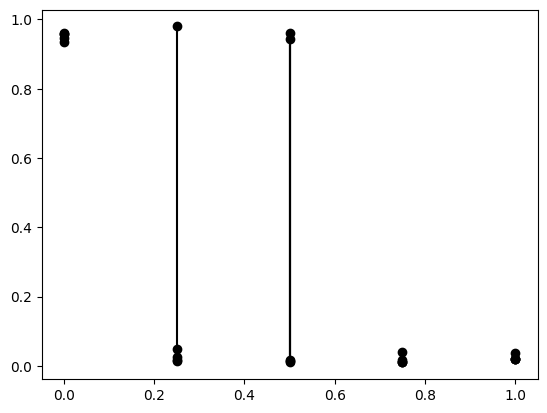

In [172]:
for i, param in enumerate(centering):
    plt.plot([param] * len(metrics[i]), metrics[i], marker='o', color='black')

plt.show()

In [151]:
# num_cond = 15
# num_steps = 1000
# centering = np.linspace(0.0005, 1, num=10)
store1 = [[0.8356974376838147, 0.503968266155396, 0.9841301947803289, 0.2864986850218101, 0.7533439517881934, 0.9004960459979511, 0.9509704824388112, 0.8365666234812579, 0.9578461268645895, 0.3503414299906628, 0.558975083732489, 0.7372077785453046, 0.8700964267572616, 0.944488026682326, 0.9920862499497192], [0.8561951084275244, 0.9999995449498694, 0.009143514133293841, 0.9999986546619052, 0.029107280828803515, 0.6418208947244635, 0.9136596556089716, 0.21830279219789647, 0.999826008396564, 0.9999594994607081, 0.012455881163139369, 0.9998239978847201, 0.8126776949079978, 0.9999699222012837, 0.9988997550698643], [0.07437722739334901, 0.02445459187267426, 0.032808457112769376, 0.9999982057603072, 0.01246323252073316, 0.0638369915467463, 0.04829561916077429, 0.9884595712748901, 0.030198716592049587, 0.043010217801224715, 0.019092431258764576, 0.03540542183722497, 0.7598099284759362, 0.763865831063674, 0.015453820931610757], [0.7627528176345677, 0.03653606334235405, 0.9999918159389583, 0.9934415871948334, 0.02869026302379362, 0.020957235843270375, 0.9996872306074193, 0.019153942041382894, 0.008908115870555714, 0.0625358217350883, 0.9991090171280786, 0.9862067203315208, 0.029017104972673773, 0.007486087770810464, 0.15329061387067572], [0.6299659190252032, 0.8003690551905708, 0.40792990979961796, 0.012975261391530324, 0.8432671099576015, 0.9805870890201849, 0.7386307949239911, 0.00883440366209614, 0.0116808117284517, 0.9860887609517379, 0.4852011987830664, 0.969526945897784, 0.5353600129572853, 0.19814952259219853, 0.7572414991917673], [0.02008857240059792, 0.025517435870599053, 0.021683862888429422, 0.8739164401913104, 0.011941759124796964, 0.026529787644681987, 0.025385343582262472, 0.023932159677076122, 0.051604336674399405, 0.018472135425852087, 0.02728937867945629, 0.48343883464544884, 0.016664527748646595, 0.0340515396941838, 0.9058906621988942], [0.008429706378983201, 0.00591770073755815, 0.006129622540751425, 0.03292710928131432, 0.9440577687936493, 0.013021893864747627, 0.03817343052425043, 0.011092511241013734, 0.02870419193511282, 0.026854198795626758, 0.022661933367640365, 0.0332509117394012, 0.8457337745602159, 0.009061006002485168, 0.02971763567472982], [0.9563066518141106, 0.01220839771608308, 0.04211484752296503, 0.01529996991682393, 0.006418828482882094, 0.01516450545451712, 0.020630707792177745, 0.024268973125445657, 0.028314877833029137, 0.00826835055423881, 0.026275560730852826, 0.017155064610840473, 0.0067374552826802575, 0.021143385610963912, 0.7791677664511016], [0.020623327872789136, 0.019735873885575884, 0.017093626027021254, 0.03253264588820823, 0.7899604129418867, 0.011078865218114624, 0.03140004367387652, 0.023992598610992552, 0.9651950216782643, 0.018943770268981572, 0.006658581945908568, 0.018185335610832087, 0.03193718378941024, 0.039816765726824695, 0.0047015347518070474], [0.028189779717173458, 0.01936536661224865, 0.012499725261524717, 0.013290854554007202, 0.02967881012528378, 0.005423596859952189, 0.03475588554822265, 0.013956690946670017, 0.02491590074659371, 0.015560865245611573, 0.01078512352621422, 0.048383352436565705, 0.03386295094877733, 0.014687903218730577, 0.005828723930697243]]

[[0.8356974376838147, 0.503968266155396, 0.9841301947803289, 0.2864986850218101, 0.7533439517881934, 0.9004960459979511, 0.9509704824388112, 0.8365666234812579, 0.9578461268645895, 0.3503414299906628, 0.558975083732489, 0.7372077785453046, 0.8700964267572616, 0.944488026682326, 0.9920862499497192], [0.8561951084275244, 0.9999995449498694, 0.009143514133293841, 0.9999986546619052, 0.029107280828803515, 0.6418208947244635, 0.9136596556089716, 0.21830279219789647, 0.999826008396564, 0.9999594994607081, 0.012455881163139369, 0.9998239978847201, 0.8126776949079978, 0.9999699222012837, 0.9988997550698643], [0.07437722739334901, 0.02445459187267426, 0.032808457112769376, 0.9999982057603072, 0.01246323252073316, 0.0638369915467463, 0.04829561916077429, 0.9884595712748901, 0.030198716592049587, 0.043010217801224715, 0.019092431258764576, 0.03540542183722497, 0.7598099284759362, 0.763865831063674, 0.015453820931610757], [0.7627528176345677, 0.03653606334235405, 0.9999918159389583, 0.993441587194